In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import tensorflow as tf
tf.debugging.set_log_device_placement(True)
tf.config.gpu.set_per_process_memory_growth(True)

In [2]:
# import quilt


# quilt.login()

In [3]:
from nucleus.dataset.datasets.jersey import BasketballJerseyDataset

# dataset = BasketballJerseyDataset()
# dataset.save()

dataset = BasketballJerseyDataset.load(
    './dataset_cache/basketball_jerseys/basketball_jerseys.json.gz'
)

In [4]:
dataset.df

,labels,path
0,"[visible, 23]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
1,"[visible, 04]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
2,"[occluded, None]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
3,"[visible, 34]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
4,"[visible, 02]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
5,"[visible, 15]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
6,"[occluded, None]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
7,"[occluded, None]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
8,"[occluded, None]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
9,"[occluded, None]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...


In [5]:
df = dataset.df.copy()

len(df)

1942

In [6]:
to_drop = []
for i, row in df.iterrows():
    labels = row['labels']
    if labels[0] == 'occluded':
        to_drop.append(i)
        
len(to_drop)

736

In [7]:
df = df.drop(index=to_drop)

len(df)

1206

In [8]:
dataset.df = df

In [9]:
dataset.df

,labels,path
0,"[visible, 23]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
1,"[visible, 04]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
3,"[visible, 34]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
4,"[visible, 02]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
5,"[visible, 15]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
14,"[visible, 43]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
15,"[visible, 12]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
17,"[visible, 32]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
19,"[visible, 13]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...
21,"[visible, 15]",/home/joan/cvdev/nucleus/notebooks/dataset_cac...


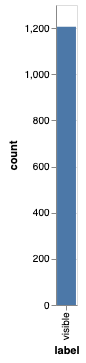

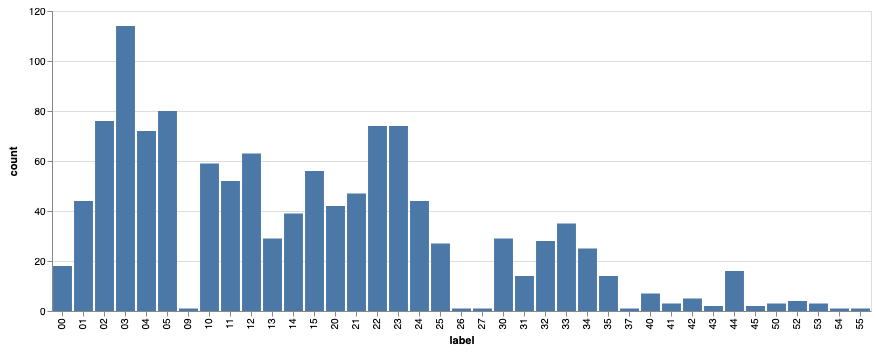

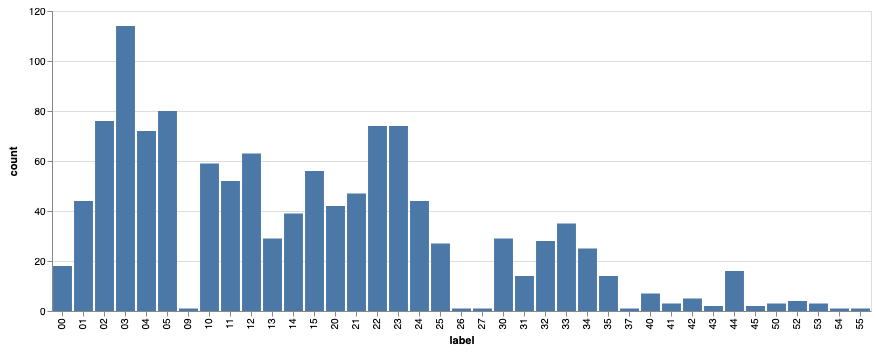

In [10]:
dataset.view_labels_distributions()

In [11]:
res = []
for img in dataset.images:
    res.append(img.resolution)
resoltuion_mean = tf.reduce_mean(res, axis=0)

print(resoltuion_mean)

tf.Tensor([165  76], shape=(2,), dtype=int32)


In [12]:
import tensorflow as tf

from nucleus.image import Image


ds = tf.data.Dataset.from_tensor_slices(dataset.df['path'].tolist())

def py_load_image(path):
    image = Image.load(path.numpy().decode("utf-8"))
    
    return (
        tf.cast(tf.image.resize(image.hwc, size=[224, 224]), tf.float32), 
        tf.one_hot(
            tf.cast(tf.convert_to_tensor(float(image.labels[1])), tf.int32),
            100
        )
    )


def load_image(path):
    image = tf.py_function(
        py_load_image,
        [path],
        [tf.float32, tf.float32]
    )
    return image

ds = ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [13]:
ds = ds.shuffle(buffer_size=1206)
ds = ds.repeat(count=1)
ds = ds.batch(batch_size=32)
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [14]:
ds

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.float32)>

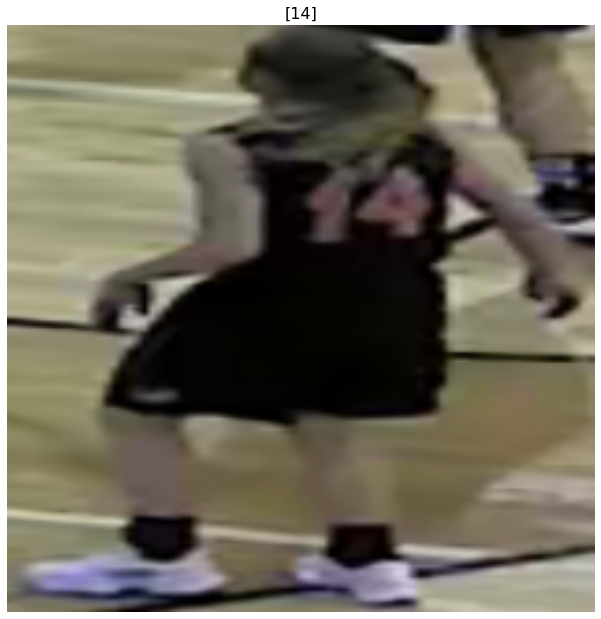

In [15]:
import matplotlib.pyplot as plt


imgs = []
for image_batch, labels_batch in ds.take(1):
    for i in range(1):
        imgs.append(
            Image.from_hwc(
                hwc=tf.cast(image_batch[i], tf.uint8), 
                labels=[tf.where(tf.equal(labels_batch[i], 1))[0]]
            )
        )
        
        imgs[i].view()
        plt.show()
        
#         input()

In [16]:
extractor = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
extractor.trainable = False

print(extractor)

/home/joan/miniconda3/envs/nucleus_env/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [17]:
image_batch, label_batch = next(iter(ds))

feature_map_batch = nasnet_mobile(image_batch)
print(feature_map_batch.shape)

(32, 7, 7, 2048)


In [18]:
# model = tf.keras.Sequential([
#     nasnet_mobile,
#     tf.keras.layers.GlobalMaxPooling2D(),
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Softmax()
# ])

In [19]:
model = tf.keras.Sequential([
    extractor,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Softmax()
])

In [20]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 2.612593e-27
max logit: 0.99983215

Shape: (32, 100)


In [21]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(),
    ]
)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
dropout (Dropout)            (None, None, None, 2048)  0         
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
_________________________________________________________________
softmax (Softmax)            (None, 100)               0         
Total params: 23,792,612
Trainable params: 204,900
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
h = model.fit(ds, epochs=100)

Epoch 1/100
38/38 [==============================] - 16s 417ms/step - loss: 23.8190 - categorical_accuracy: 0.0398
Epoch 2/100
38/38 [==============================] - 12s 306ms/step - loss: 20.5431 - categorical_accuracy: 0.0730
Epoch 3/100
38/38 [==============================] - 12s 313ms/step - loss: 17.4041 - categorical_accuracy: 0.0995
Epoch 4/100
38/38 [==============================] - 12s 308ms/step - loss: 14.3946 - categorical_accuracy: 0.1443
Epoch 5/100
38/38 [==============================] - 12s 309ms/step - loss: 13.2685 - categorical_accuracy: 0.1692
Epoch 6/100
38/38 [==============================] - 12s 307ms/step - loss: 11.4772 - categorical_accuracy: 0.2106
Epoch 7/100
38/38 [==============================] - 12s 312ms/step - loss: 10.2250 - categorical_accuracy: 0.2413
Epoch 8/100
38/38 [==============================] - 12s 309ms/step - loss: 8.3851 - categorical_accuracy: 0.2886
Epoch 9/100
38/38 [==============================] - 12s 304ms/step - loss: 7.575

[[1.09065138e-03 2.58901719e-06 4.23191977e-07 2.58177985e-03
  3.60292818e-09 4.97569043e-12 3.20211696e-12 2.55294241e-18
  4.16625310e-15 3.53991182e-17 9.97890529e-05 3.58527846e-04
  4.44795614e-06 1.67558589e-11 1.52979017e-04 9.93437350e-01
  2.44605793e-15 1.34424145e-22 1.46415435e-17 2.84945071e-12
  2.45644187e-04 9.55589712e-07 2.29646260e-10 1.45288832e-05
  1.82319782e-03 2.62456687e-08 1.63628180e-10 7.35081787e-12
  3.28379303e-11 8.36654337e-15 1.26604846e-06 1.17297276e-07
  1.20016906e-04 1.72574564e-05 1.79405606e-06 1.04575622e-06
  3.43310047e-10 5.00511743e-10 5.78596077e-14 1.07698586e-13
  4.54030414e-05 2.60578688e-08 8.20568715e-08 2.86727673e-13
  1.23204691e-08 1.59214499e-11 4.34754780e-15 1.08849073e-13
  1.82328302e-16 1.06473760e-12 2.20013856e-08 1.13097953e-13
  5.09998510e-12 1.06569669e-08 2.98882419e-13 2.11758961e-11
  7.44629112e-17 9.11767523e-18 4.38381240e-18 4.42518743e-14
  3.55945115e-17 2.37477970e-18 1.19881438e-12 1.35860426e-14
  6.4724

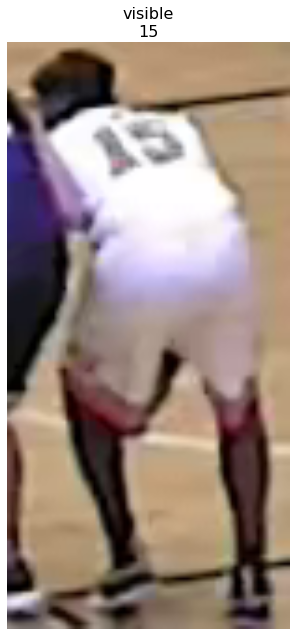

In [28]:
ind = -5

c = model.predict(tf.cast(tf.image.resize(dataset.images[ind].hwc, size=[224, 224]), tf.float32)[None])

print(c)
dataset.images[ind].view()

In [29]:
(-c[0]).argsort()[:5]

array([15,  3, 24,  0, 11])

In [30]:
h.model.evaluate(ds)

38/38 [==============================] - 11s 286ms/step - loss: 0.0384 - categorical_accuracy: 0.9876


[0.03838379692139202, 0.9875622]

In [ ]:
print('\nhistory dict:', h.history)